## Analyzing Gapminder dataset using python 
###### Nishad Tupe
###### Indiana University, Bloomington
###### Applied Data Science SPR-19
###### 23-Apr-2019

# Questions
* How the data is distributed , do we observe normal or skewed distributions among variables ?
* What is most densly populated region and country ?
* What are the regions or countries that have highest life expectancy ?
* What is average growth in population per year?
* How the life expectancy have been changed over the regions , does growth in medicines remedies helped to improve life expectancy ?
* Do we have any correlation between variables ?
* Can we predict the life expectancy using available features  ?
* Can we statistically test our model that predicts the life expectancy ?
* What property does the residual shows heteroscedasticity or homoscedasticity ?
* If we build unsupervised model ,to form clusters using available features ? 
* If yes, what are the optimal clusters for the current dataset.

### Load Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import dataset 

Pandas offer various libraries to import the data from flat files; one such method is read_csv.

In [3]:
# Use standard pandas read_csv method to import the dataset into memory
df = pd.read_csv("./Data/gapminder.csv")

In programming languages functions are very useful often to perform a series of task, not only it simplifies the code but also increases the reusability. 
In the section below I have written a function that prints essential characteristics for the datasets such as the number of columns, rows, null/missing values, basic summary statistics of continuous variables. 
I can use this function anywhere in my code.  

### Describe your Dataset

In [4]:
def describe_data(df):   
    # Check the column data Types
    print('*'*50)
    print('Dataset information \n')
    print(df.info())
    # Useful isna function to check sum for Null/Na values
    print('*'*50)
    print('Nulls / missing values\n')
    print(df.isna().sum())
    # Describe gives us summary statistics on numerical columns
    print('*'*50)
    print('Summary Statistics\n')
    print(df.describe())
    # head command allows us to see sample rows , you can pass argument 'n' as number rows you want to sample for 
    # e.g df.head(10) will Display first 10 rows 
    print('*'*50)
    print('Unique countries and Regions\n')
    print("Unique Countries: ",df['Country'].nunique())
    print("Unique Regions: ",df['region'].nunique())

describe_data(df)

**************************************************
Dataset information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 6 columns):
Country       41284 non-null object
Year          41284 non-null int64
life          41284 non-null float64
population    15467 non-null object
income        38943 non-null float64
region        41284 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB
None
**************************************************
Nulls / missing values

Country           0
Year              0
life              0
population    25817
income         2341
region            0
dtype: int64
**************************************************
Summary Statistics

               Year          life         income
count  41284.000000  41284.000000   38943.000000
mean    1907.462504     42.884766    4570.795214
std       62.241440     16.220812   10096.543747
min     1800.000000      1.000000     142.000000
25%     185

The dataset contains total of *41,284 rows* (instance/observations) and *6 columns* (features/variables).
3 columns have object datatype while 3 have *float/int* datatypes.

There is presence of wrong data type for the *population column*  hence we could not get the summary statistics, it needs to be converted numeric.

Presence of missing values *(NaN)* in population and income section.

The gapminder dataset contains census information about *197 countries and 6 regions*.
In Summary statistics we can see *Year*, the dataset has oldest to latest values for year variable *1800 and 2015* respectively.

Without any modification, the raw data average *life expectancy* is close to *43* years. While the average income which I presume to *GDP* per capita is *4570*. 

# Preprocessing

#### Convert columns to appropiate datatypes

The population column contains some observations that contain numbers with commas. Using Pandas replace method we can convert the population column to float which more appropriate. 

#### Scaling and Normalizing for better correlations and models

if we want to compare or find relationships in two different scale variables, it is important to scale them on same units.
We see a correlation between life and income column however they both are are having different units.
In such case we can take a log of income column that will produce better correlation and also it will normalize the dataset.

**Before Normalizing Correlation in life expectancy and income**

In [4]:
df['income'].corr(df['life'])

0.5764090225927698

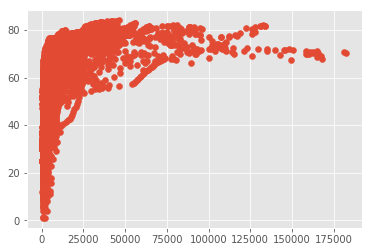

In [5]:
plt.style.use('ggplot')
plt.scatter(df['income'],df['life'])

As part of the project we also need to build machine learning models.
Hence it important to scale the variables so to measure the correlations correctly.
We can see improvement in pearson correlation coefficient

**After Normalizing Correlation in life expectancy and income**

In [6]:
np.log10(df['income']).corr(df['life'])

0.8183561134086764

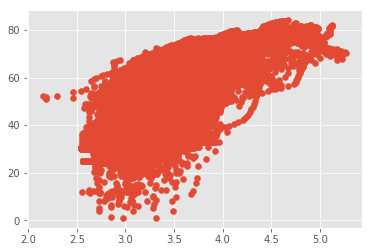

In [7]:
plt.scatter(np.log10(df['income']),df['life'],marker='o')

#### Handling missing values

In the real-world dataset, we find the datasets with missing values, is essential to handle them as specific calculations cannot work when the dataset is containing missing values this is especially true when building a machine learning model. 
There are several strategies to handle the missing data. E.g., working with time series data, we can use a forward/backward fill.
For numeric columns, we can use the imputation technique and use relevant statistics such as mean or median.
Here I decided to impute the NaN values using Pandas group by and transform method. This step is crucial in my analysis as it prevents inflating our results, it would not be appropriate to impute missing values directly using column means, since the median or mean for an entire column could be very high.

#### Write a function that does all of above

In [16]:
print('Dataset shape before cleaning and imputing and scaling: ',df.shape)

Dataset shape before cleaning and imputing and scaling:  (41284, 6)


In [5]:
# Function that imputes mean and median

def impute_mean(series):
    return series.fillna(series.mean())

def impute_median(series):
    return series.fillna(series.median())

# Function to clean the data frame

def preprocessing(df):
    df.population = df.population.str.replace(",","").astype(float)
    by_country_region = df.groupby(['Country'])
    by_region = df.groupby(['region'])
    df.income = by_country_region['income'].transform(impute_mean)
    df.population = by_country_region['population'].transform(impute_mean)
    
    # despite imputing some countries still have null values as there is no historical information available for
    # any of the rows, however I decided to impute median values by region in income column for such rows.
    
    df.income = by_region['income'].transform(impute_median)
    
    # I will create a new variable which will be useful when analyzing the relationships
    # This will be also useful in machine learning regression model.
    
    df['log_income'] = np.log1p(df['income'])
    
    return df 

In [6]:
# Call the clean data 
df = preprocessing(df)
# As we imputed the data there are no null values
df.isna().sum()

Country       0
Year          0
life          0
population    0
income        0
region        0
log_income    0
dtype: int64

In [21]:
print('Dataset shape After cleaning and imputing and scaling : ',df.shape)

Dataset shape After cleaning and imputing and scaling :  (41284, 7)


# Exploratory Data Analysis

*Instead of dropping half dataset, we are still holding on most of the important data which would be useful for model building.*

Data visualization comes in handy while performing exploratory analysis. It allows to draw distributions, scatter plot to reveal correlations.It also let you discover trends or patterns in a data set and are often referred as Exploratory Data analysis.


Histograms are great at showing outliers and displaying how the data is distributed. Also, not all variables we collect are normally distributed! Hence we can make incorrect conclusions by assuming normality.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027550A9F7B8>,
      dtype=object)

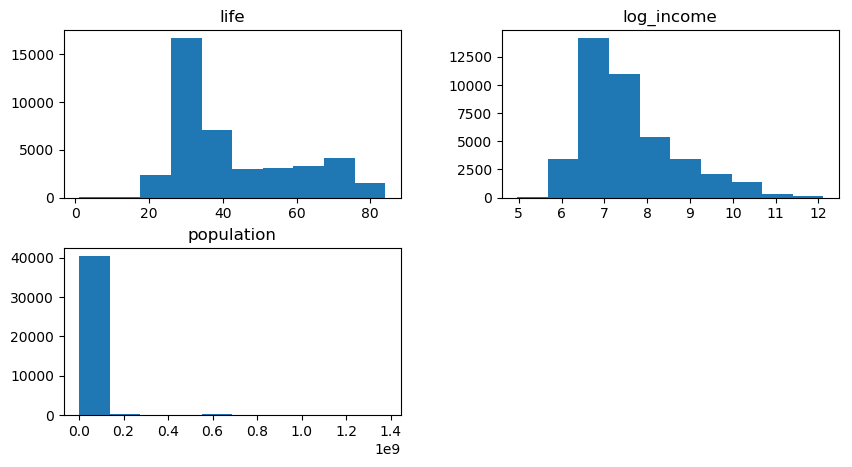

In [17]:
plt.style.use('default')
df[['log_income','life','population']].hist(figsize=(10,5),grid=False)

We can see a Power-law distribution for the population column.
The log_income column is not perfectly normally distributed, some countries pulling the tail due to high income(GDP).
Also, life expectancy column has skewed distributions,
the life expectancy seems very low *30 - 40* overall. 

Box plots are a common visualization for displaying the general shape of distribution using intervals, let's explore the life expectancy for each region.

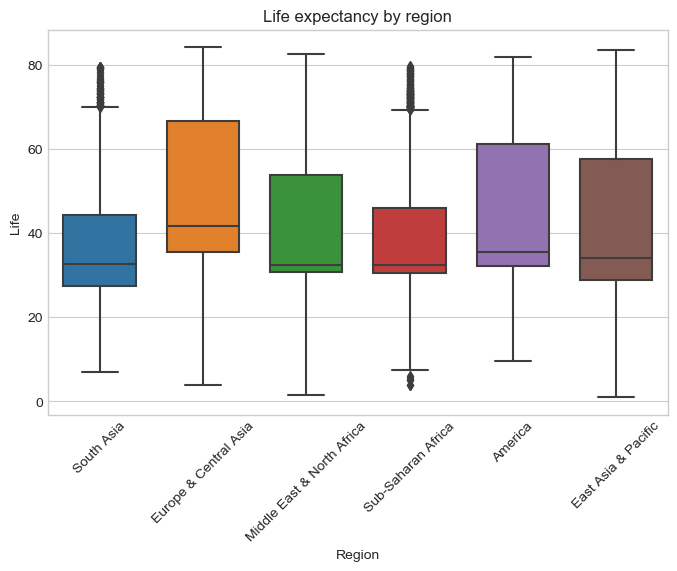

In [70]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="region", y="life",data=df,color=None,palette=None,width=0.7)
plt.xticks(rotation=45)
plt.title('Life expectancy by region')
plt.xlabel('Region')
plt.ylabel('Life');

As we can see the median life expectancy for most of the regions lies between 30-40. 
The median life expectancy of Europe and Central Asia is highest followed life expectancy America, East Asia, and Pacific. However, This results also provokes question that why does life expectancy is so low. Let's break down the data by Years

It is visible the median life expectancy has been shifted drastically after 1950 and this could be also verified through time serires analysis, I am going to cover in later sections.

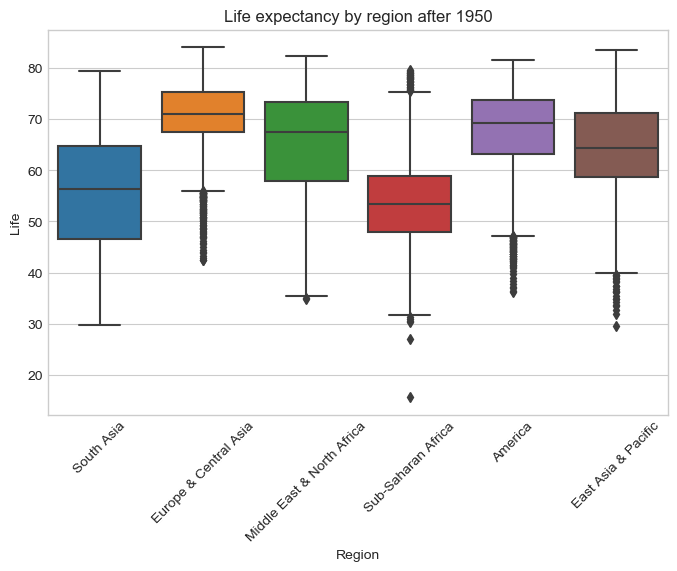

In [68]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="region", y="life",data=df[df['Year']>=1950])
plt.xticks(rotation=45)
plt.title('Life expectancy by region after 1950')
plt.xlabel('Region')
plt.ylabel('Life');

With things like categorical variables,if we want to look at how the data is distributed between the categories. Bar graphs are great here. Let beging to analyze the categorical data start with income across region variable

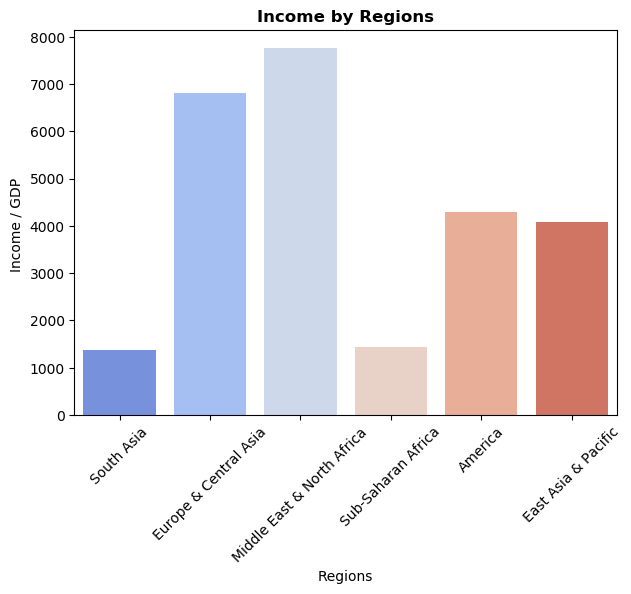

In [65]:
plt.figure(figsize=(7,5))
sns.barplot(x='region',y='income',data=df,ci=None,palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Income by Regions",fontweight="bold")
plt.xlabel("Regions")
plt.ylabel("Income / GDP ") ;

The Middle East and North Africa have the highest income or GDP per capita. They are followed by 'Europe & Central Asia' and America and the remaining regions. It would be interesting to verify this finding by seeing the top countries in these regions.

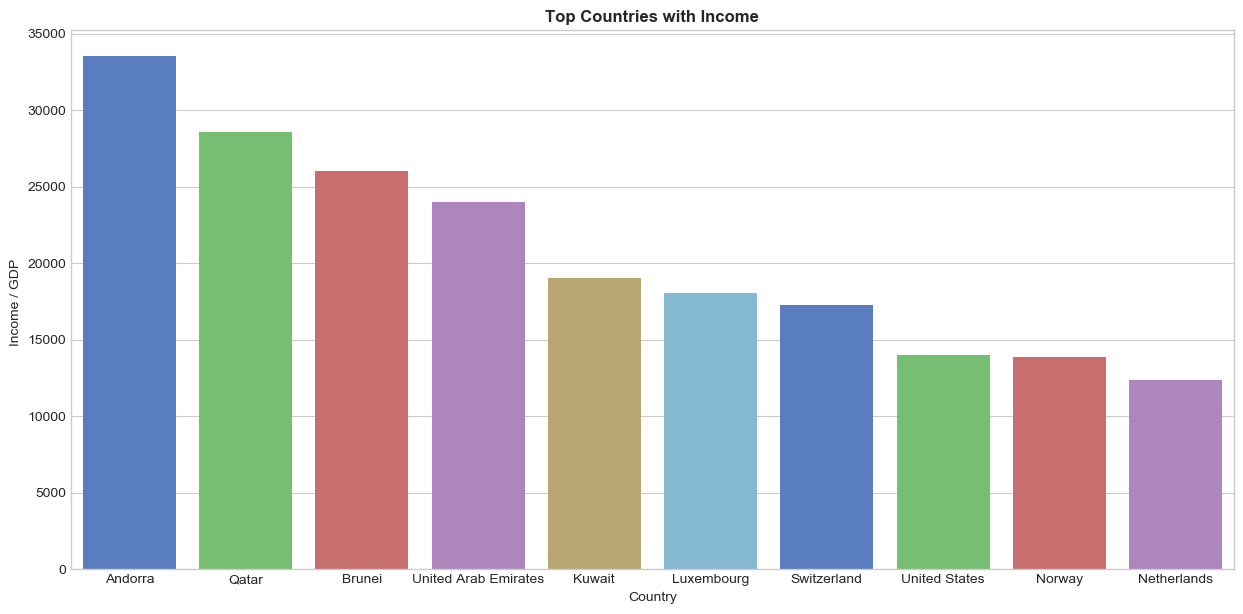

In [73]:
plt.figure(figsize=(15,7))
df_cp = df.groupby(['Country'],as_index=False).mean().sort_values(by='income',ascending=False).iloc[:10]
sns.barplot(x='Country',y='income',data=df_cp,palette='muted',estimator=np.mean)
plt.title('Top Countries with Income',fontweight="bold");
plt.xlabel("Country")
plt.ylabel("Income / GDP "); 

In [84]:
df2 = pd.read_csv("./Data/gapminder.csv")

In [95]:
country=['Andorra','Qatar','United Arab Emirates','Kuwait','Luxembourg','Switzerland','United States','Norway','Netherlands']
incomes ={}
for i in country:
       incomes[i] = (df2[df2['Country']==i].income.mean())
incomes

{'Andorra': 33553.84782608696,
 'Qatar': 28556.46759259259,
 'United Arab Emirates': 23994.99537037037,
 'Kuwait': 19009.64814814815,
 'Luxembourg': 18023.90740740741,
 'Switzerland': 17287.77314814815,
 'United States': 14030.824074074075,
 'Norway': 13880.88425925926,
 'Netherlands': 12389.768518518518}

So Andorra seems to have the highest GDP, Andorra is the smallest country in Europe and located between the border of France and Spain. One of the prime reason could be its tourism industry. The observations from the above bar chart show maximum countries are from Europe & Middle East. Next category to explore would be population by the region.

In [68]:
#plt.ticklabel_format(style='plain', axis='y')
df.groupby('region').population.max()

region
America                       3.217736e+08
East Asia & Pacific           1.376049e+09
Europe & Central Asia         1.484358e+08
Middle East & North Africa    9.150808e+07
South Asia                    1.311051e+09
Sub-Saharan Africa            1.822020e+08
Name: population, dtype: float64

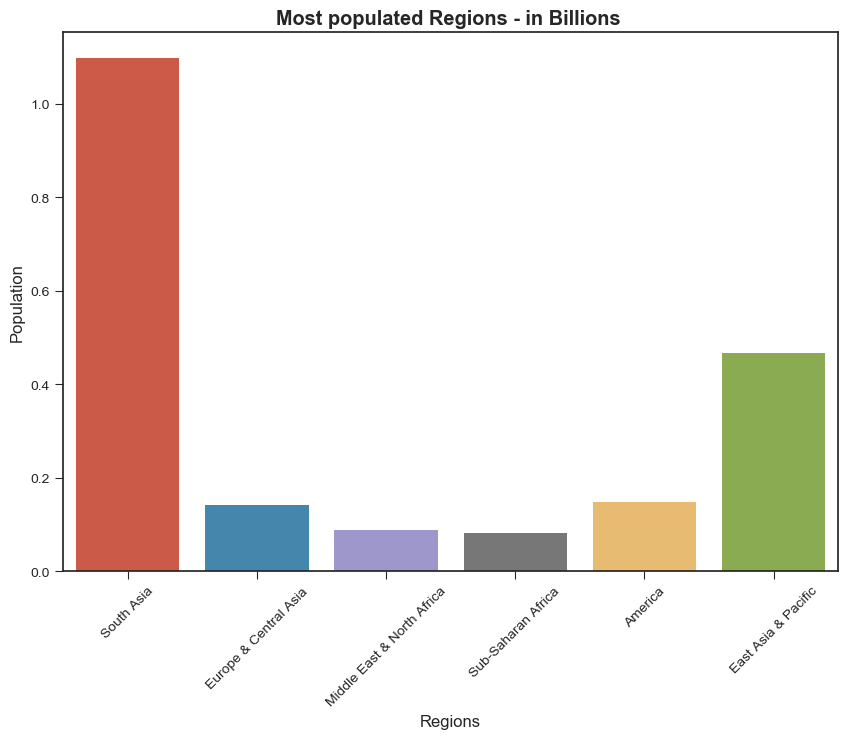

In [67]:
plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.set_style('ticks')
sns.barplot(x='region',y=df['population']/100000000,data=df,ci=None)
plt.xticks(rotation=45)
plt.title('Most populated Regions - in Billions ',fontweight="bold")
plt.xlabel("Regions")
plt.ylabel("Population");

China and India - not surprisingly most populated countries in South Asia

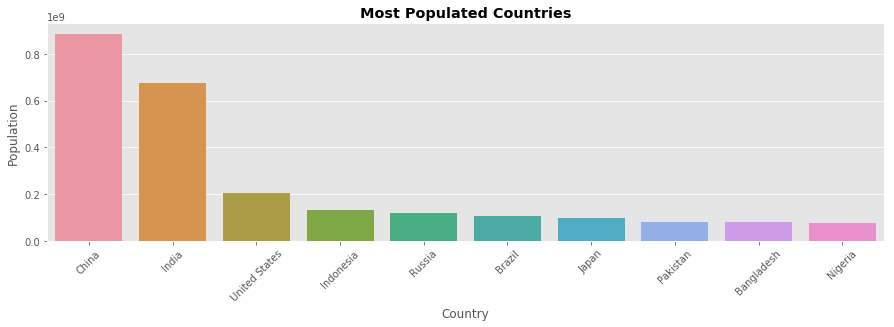

In [33]:
plt.figure(figsize=(15,4))
df_cn = df.groupby(['region','Country'],as_index=False).mean().sort_values(by='population',ascending=False).iloc[:10]
sns.barplot(x='Country',y=(df_cn['population']),data=df_cn,estimator=np.mean)
plt.title('Most Populated Countries',fontweight="bold")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Population");

China and India are one of the most populated is countries of the world and same is visible from the below bar charts below. They both contribute to the  South Asia' population. East asia and Pacific are next highest populated region.

Time series charts are useful see the changes in data or quantity with respect to time.
It is greatly useful while doing forcasting as it shows gradual changes and expose time as one of important feature.
As we seen from boxplot sharp rise in life expectancy lets validate with line charts for population life expectancy both

In [105]:
# only consider the beyong 1950 (just see if we sharp rise)
growth = df[df['Year']>1950].groupby(['Year','region']).population.mean().unstack()

##### South Asia population growth post 1950 is astonishing

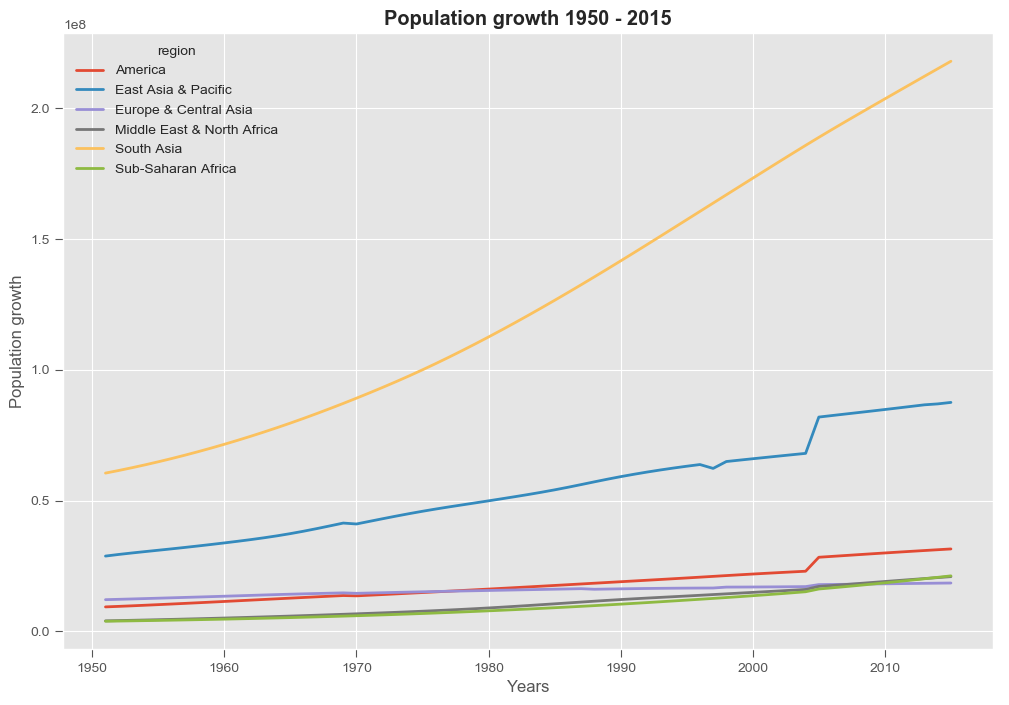

In [118]:
plt.style.use('ggplot')
growth.plot(figsize=(12,8),linewidth=2)
plt.xlabel('Years')
plt.ylabel('Population growth')
plt.title('Population growth 1950 - 2015',fontweight="bold");

There predominant growth in South Asia's population compares to the other regions.

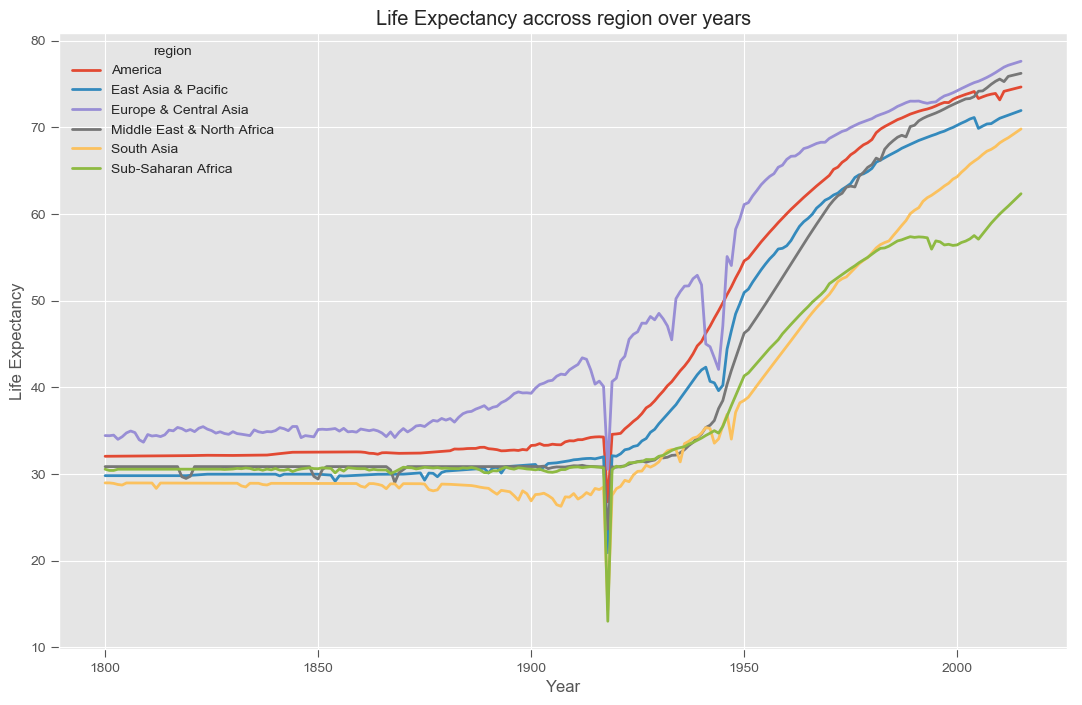

In [125]:
test = df.groupby(['Year','region']).life.mean().unstack()
test.plot(figsize=(13,8), title='Life Expectancy accross region over years', linewidth=2.0)
plt.ylabel('Life Expectancy');

Do the latest developments of medicines has played a role? 
A lot of deceases are recoverable due to the development of advanced medicine and procedures. We see consistent growth in life expectancy post-1950.  

# Regression Analysis

Regressions models help to examine the linear relationships between two (Simple regression) or more variables (Multiple regression). I will be using both using sci-kit learn and statsmodel python libraries.

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer,MinMaxScaler,StandardScaler,Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

#### Analyzing correlations before building model

Heatmaps visualizes the correlations among the features. 
With time series analysis and scatter plots, there was visible positive correlations between the year, income variables with the life expectancy. 
This step is crucial while developing the regression model as Income, and Year variables can be good predictors to measure life expectancy.

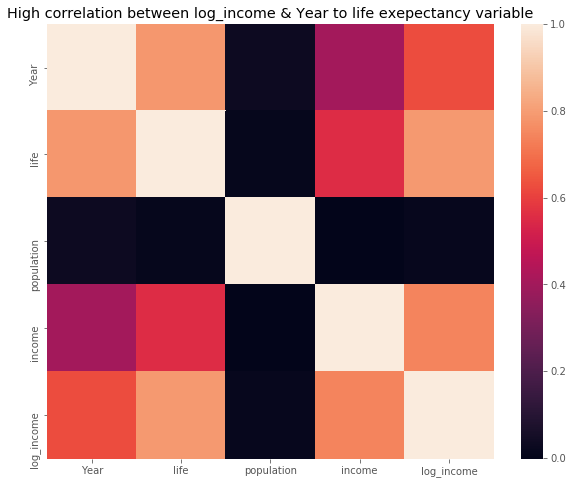

In [222]:
#plot the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title('High correlation between log_income & Year to life exepectancy variable');

#### Prepare the dataset with dummy variables

It is vital to use essential features and try to get an accurate model as much possible. 
Pandas come with getting dummies methods which converts the categorical columns to numerics vectors which are more understandable to machine learning algorithms. 
Here we create a new column of dummy variable(numeric) such that numbers represent  regions. 
Now let's divide the dataset into  X (input variable)  and y (response variable) dataset.

In [127]:
region = pd.get_dummies(data=df['region'], drop_first=True)
df_dummy = pd.concat([df,region],axis=1)

In [128]:
df_dummy.head()

,Country,Year,life,population,income,region,log_income,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,Afghanistan,1800,28.211000,3.280000e+06,603.0,South Asia,6.403574,0,0,0,1,0
1,Afghanistan,1801,28.200753,1.321200e+07,603.0,South Asia,6.403574,0,0,0,1,0
2,Afghanistan,1802,28.190507,1.321200e+07,603.0,South Asia,6.403574,0,0,0,1,0
3,Afghanistan,1803,28.180260,1.321200e+07,603.0,South Asia,6.403574,0,0,0,1,0
4,Afghanistan,1804,28.170013,1.321200e+07,603.0,South Asia,6.403574,0,0,0,1,0


In [129]:
df_dummy.columns = ['Country', 'Year', 'life', 'population','income','region','log_income','eastasia','europe','mideastn','southasia','sahafrica']

In [130]:
y = df_dummy['life']
X = df_dummy[['log_income','Year','population','eastasia','europe','mideastn','southasia','sahafrica']]

***Very important step of Train-test split,scaling and Imputing***

Gapminder dataset contains Income, Year and lif e expectancy features highly varying in magnitudes, units, and range. The features with high magnitudes may introduce wrong calculations while calculating distances over lower magnitude variables. To prevent this we can use the sklearn's preprocessing library to scale the data.

Similarly, use train test split method that allows us to test our model against the validation set and avoids overfitting be reducing the bias, as standard practice we can use 80% of data for training and 20% of data for testing.

In [131]:

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler - Since variables are different scale 
X_train = scaler.fit_transform(X_train)
#print(X_train[:10])
X_test = scaler.transform(X_test)

# Create the regressor: lm
lm = LinearRegression()

# Fit the regressor to the training data
lm.fit(X_train,y_train)

#Predcit train data
preds_train = lm.predict(X_train)

# Predict on the test data
y_pred = lm.predict(X_test)

# Compute and print R^2 and MAE
print("R^2: {}".format(lm.score(X_train,y_train)))
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute Error: {}".format(mae))
print("RMSE",rmse)

R^2: 0.7724254168821179
Mean absolute Error: 6.210535609741699
RMSE 7.78827265822537


Looking at the errors , we are covering good amount of *variance* the model is able to explain *77%*. I am calculating mean absolute error which measures the magnitude of errors in set of predictions in sample test dataset.
So we can say our predictions are off by 6.21 years on an average.


### Model coefficients evaluation Sklearn

The bar chart below tells us which weights of the coefficients and their importance.
High weighted coefficients will have a more significant impact on the model than the low weighted.
Income and Year column has the most significant impact on our model. 
Indeed, while income positively correlated to life expectancy the time series analysis showed as years pass by the life expectancy has shown an exponential shift.

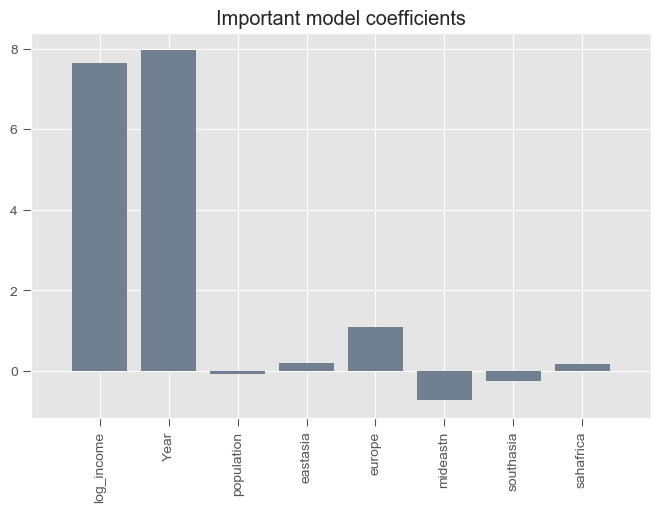

In [146]:
plt.figure(figsize=(8, 5))
plt.bar(np.arange(lm.coef_.shape[0]), lm.coef_,color='slategrey')
plt.xticks(np.arange(lm.coef_.shape[0]), X.columns, rotation='vertical')
plt.xlim([-1, lm.coef_.shape[0]])
plt.title("Important model coefficients");

In [134]:
print("Intercept: {}".format(lm.intercept_))
print("Coefficients: {}".format(lm.coef_))

Intercept: 42.95941098277664
Coefficients: [ 7.65603458  7.96301909 -0.06289889  0.20246534  1.08899031 -0.72282782
 -0.24488211  0.17511097]


We have intercept *42.96* So given all our input variables 0 or constant, we can expect life expectancy of the country around *43* Years

#### Actual vs Predictions using Sklearn regression

It was also interesting to take a look at how the predicted values relate to actual values. All the points should lie on the black dotted line (y=x) assuming that our model is perfect.
However, it is not, and we see the errors in the predictions when we applied our model on the test dataset.

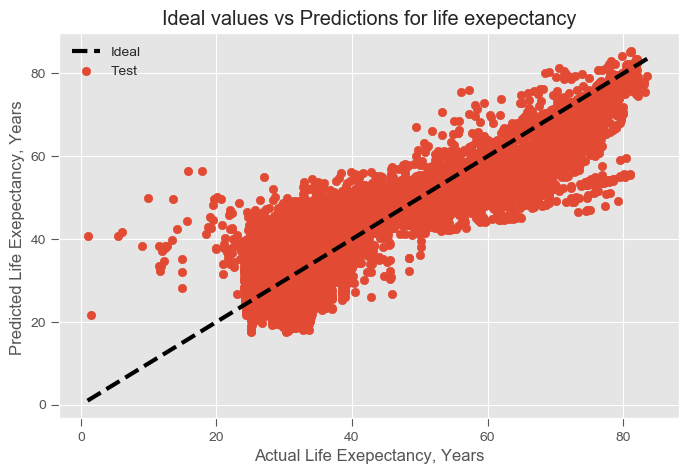

In [148]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, label="Test")
plt.title("Ideal values vs Predictions for life exepectancy")
plt.xlabel("Actual Life Exepectancy, Years")
plt.ylabel("Predicted Life Exepectancy, Years ")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="upper left",fontsize=10);

# Regression Statistical hypothess Testing

It is always important to have statistical significance associated with the predictive model.
Statsmodels is "a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration."
Reference - http://www.statsmodels.org/stable/index.html

#### Important note about scaling

The important thing to notice between the sklearn module and stats model is the scaling. 
We cannot use standard scaler like we used in sklearn, hence I am eliminated all other variables that cannot be scaled well using just log function. So here I am simply predicting log_income to the life expectancy

In [223]:
lm = 'life ~ log_income'
# use the ordinary least squares and fit the model
#x_train = sm.add_constant(X_train)
model = smf.ols(formula=lm,data=df).fit()
#print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 6.875e+04
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:19:51   Log-Likelihood:            -1.5337e+05
No. Observations:               41284   AIC:                         3.068e+05
Df Residuals:                   41282   BIC:                         3.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.5325      0.345   -135.063      0.000     -47.208     -45.857
log_income    11.8107      0.045    262.193      0.000      11.722      11.899
==============================================================================
Omnibus:                     2954.131   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4254.005
Skew:                           0.603   Prob(JB):                         0.00
Kurtosis:                       4.010   Cond. No.                         54.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
print("Intercept: {}".format(results.params[0]))

Intercept: -46.53961251524165


In [209]:
print("Coefficient: {}".format(results.params[1]))

Coefficient: 11.813984313938356


The mean absolute error calculates the mean absolute error function for the forecast and the eventual outcomes.

In [226]:
y_preds = model.predict(X_test)
mean_absolute_error(y_test, y_preds)

7.579530508040595

As we can see the mean absolute error is close to the model developed by sci-kit learn, sci-kit learn the error is small as we have 
used multiple features however the prediction error is not that bad.

#### Interpretation of statistical table

* Adjusted. R-squared - Reflects the fit of the model, proportion of the variance explained. R-squared values range from 0 to 1, where a higher value generally indicates a better fit in our case it is 62.5 , is it good - hard to say every domain has different threhold values.

* Intercept  - If all the coefficients are zero, then the expected output Y would be equal to the const or intercept, coefficient but in our case we have significant coefficients for income column and life expectancy cannot be negative.

* Coefficient  - Represents the change in the output Y due to a change of any of X,for e.g in this case Y will increase every additional 1 unit (We have taken log of income) increase in GDP we see increase with the increase in life expectancy by 11.81 years

* std err  - Reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy  

* Hypothesis Testing and p-values - P values indicates that the coefficients are statistically significant, in this case they are smaller 0.05 cut offf hence our so there is relationship between log_income and life expectancy.

# How Well Does the Model Fit the data ?

The plot code section has been taken from the below link which provided during ADS class.
Reference:https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

#### QQ Plot

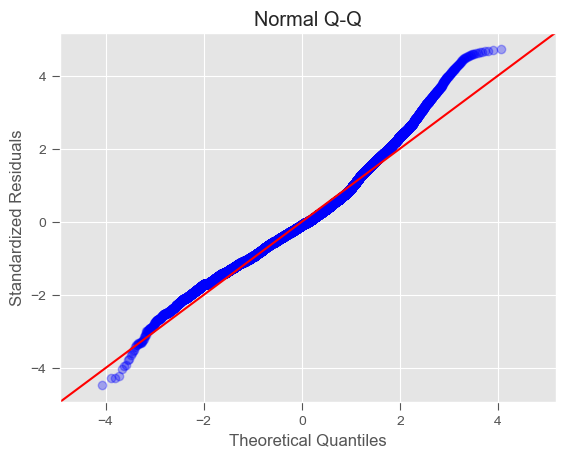

In [227]:
residuals = model.get_influence().resid_studentized_internal

# import probability plot
from statsmodels.graphics.gofplots import ProbPlot

q_plot = ProbPlot(residuals)
q_prob = q_plot.qqplot(line='45', alpha=0.3, color='blue', lw=2)

# add title, x and y labels
q_prob.axes[0].set_title('Normal Q-Q')
q_prob.axes[0].set_xlabel('Theoretical Quantiles')
q_prob.axes[0].set_ylabel('Standardized Residuals');

Along with distribution plots we used in sklearn, qqplot is way to check if the residuals are normally distributed
In this case we can see that the residuals aligned with straight line and indicate normal distribution.
At the end the residuals get away from line that's because the presence of outliers

#### Residual vs Fitted plot

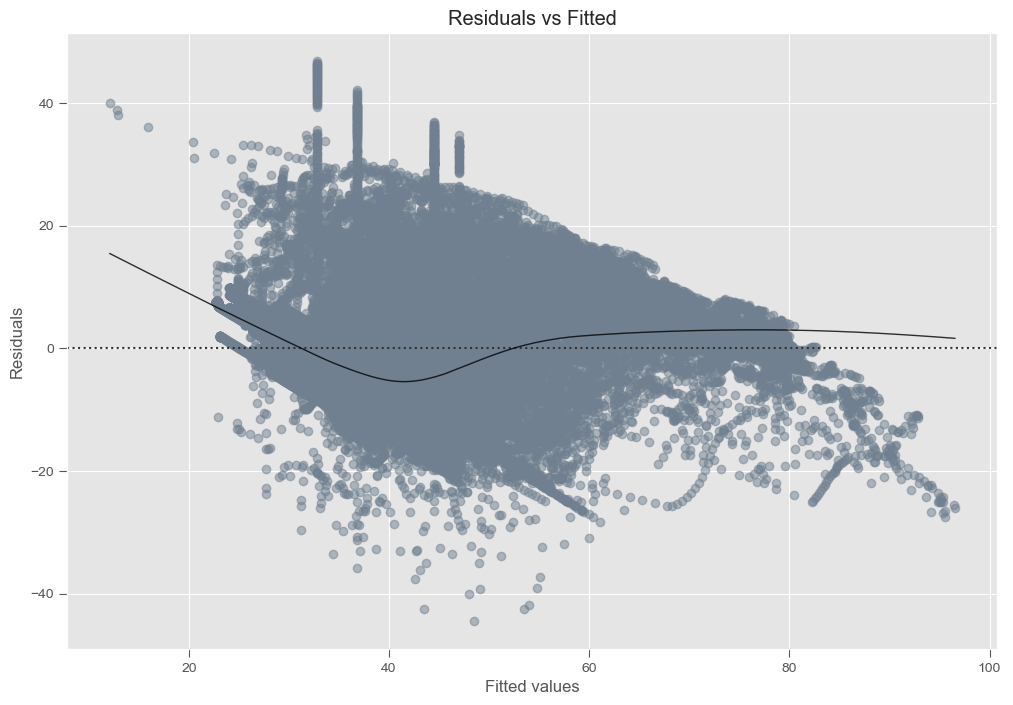

In [229]:
model_fitted_y = model.fittedvalues
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'life', data=df_dummy, lowess=True, scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'black', 'lw': 1, 'alpha': 0.8},color='slategray')

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

This plot shows if residuals have linear or non-linear patterns, we can see some kind of polynomial distribution of residuals they are not exactly random as we would expect.
However clearly plot looks ok and relatively shapeless and even distributions of point on either side of the line, residuals get smaller as we go from left right and this effect of outliers, it's not worth to over-interpret.
Overall distribution of data is random scatter that's good sign residuals do not contradict the linear assumption
especially when the life expectancy values between 50-80

#### Scale location plot

In [230]:
# fitted values 
fitted_values = model.fittedvalues

# absolute squared normalized residual values
abs_sqrt_normalized_residuals = np.sqrt(np.abs(residuals))

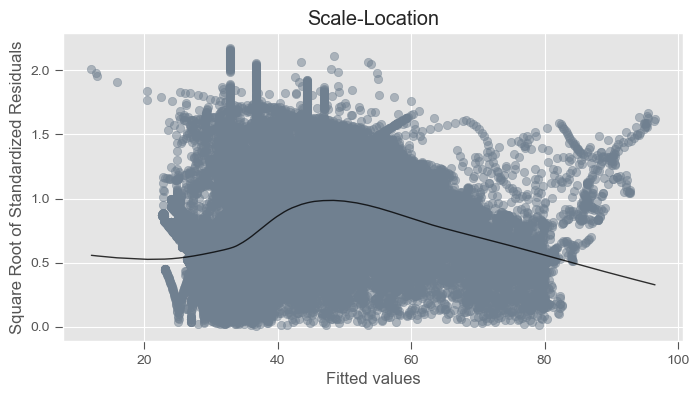

In [233]:
fig=plt.figure(figsize=(8,4))

# to plot this we need to overalay a scatter plot with the regplot

plt.scatter(fitted_values, abs_sqrt_normalized_residuals, alpha=0.5,color='slategray')
sns.regplot(fitted_values, abs_sqrt_normalized_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'black', 'lw': 1, 'alpha': 0.8})

fig.axes[0].set_title('Scale-Location')
fig.axes[0].set_xlabel('Fitted values')
fig.axes[0].set_ylabel('Square Root of Standardized Residuals');


This plot shows if residuals are spread equally along the ranges of predictors. 
in other way we can check assumption of equal variance (homoscedasticity). 
A Good plot shows a horizontal line with equally (randomly) spread points.
In this particular case, the line starts as flatten and then goes up showing the residuals for thos independent variable are more spread out is somewhat heteroscedastic (i.e. non-uniform variance) in the middle of the range.

# K-means cluster Analysis

Clustering is an unsupervised machine learning technique tries to groups properties of data or division of data based on discrete labeling.
K-means is one most popular clustering algorithm  which 
searches for a pre-defined number of clusters within an unlabeled dataset
Let start by taking a copy of existing data frame.

#### Data Preparation 
As ML algorithm works with the numerical dataset, we need to convert the region our target variable to numerics using pandas replace method

In [234]:
# Lets take a copy of our dataset
df2= df.copy()

In [235]:
# Let's convert the target variable to numerics

region = {'South Asia':0, 'Europe & Central Asia':1,
       'Middle East & North Africa':2, 'Sub-Saharan Africa':3, 'America':4,
       'East Asia & Pacific':5}

df2['region'] = df2['region'].replace(region)

As there are 6 regions we can try to fit the data in 6 clusters however we can also verify the same using the elbow method to find the optimal clusters

Lets distribute the data into X and y dataframes.

In [236]:
#  Create inpute and Target dataframe using available features.
X = df2[['life','log_income']]
y = df2[['region']]

Though we know we need to 6 clusters as we 6 regions , it is always better to obtain optimal clusters 
using the elbow method the below code genrates the elbow graph to let us verify the number of cluster assignments.

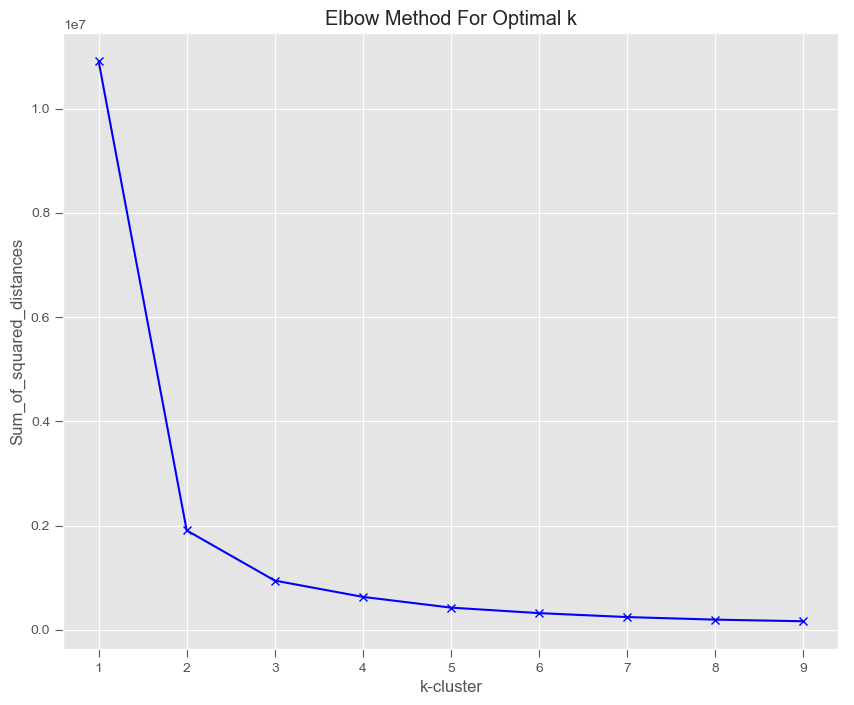

In [237]:
plt.figure(figsize=(10,8))
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k-cluster')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see the line kind of flattens out at 3 ,  but since there are 6 different region I would interested in classifying them impartially.
We have already imported the liberaries, next is to use *KMeans* functions.

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
kmeans = KMeans(n_clusters=6,algorithm = 'auto')
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [246]:
y_kmeans = kmeans.predict(X_test)

In [252]:
X_test[:, 1]

array([6.01615716, 8.12207438, 6.34913899, ..., 7.78738203, 5.97126184,
       8.67692825])

#### Confusion matrix and Classification report

In [248]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_train,kmeans.labels_))
print(classification_report(y_train,kmeans.labels_))

[[ 131  407   51  129  544  118]
 [ 935 2401 1858  780  879 1531]
 [ 307 1664  485  198  629  145]
 [ 594 4143  120 1294 1627  692]
 [ 724 2809 1001  428  756  632]
 [ 665 1687  551  381 1404  327]]
              precision    recall  f1-score   support

           0       0.04      0.09      0.06      1380
           1       0.18      0.29      0.22      8384
           2       0.12      0.14      0.13      3428
           3       0.40      0.15      0.22      8470
           4       0.13      0.12      0.12      6350
           5       0.09      0.07      0.08      5015

   micro avg       0.16      0.16      0.16     33027
   macro avg       0.16      0.14      0.14     33027
weighted avg       0.20      0.16      0.16     33027



Not bad , we were able to map the points into 6 distinct clusters and we can visualize the same using the scatter plot.
We can clearly e clusters are aligned as per the region's life expectancy and income

In [241]:
X = np.array(df2[['life','log_income']])
y = np.array(df2[['region']])

Text(0,0.5,'Income /GDP per Capita')

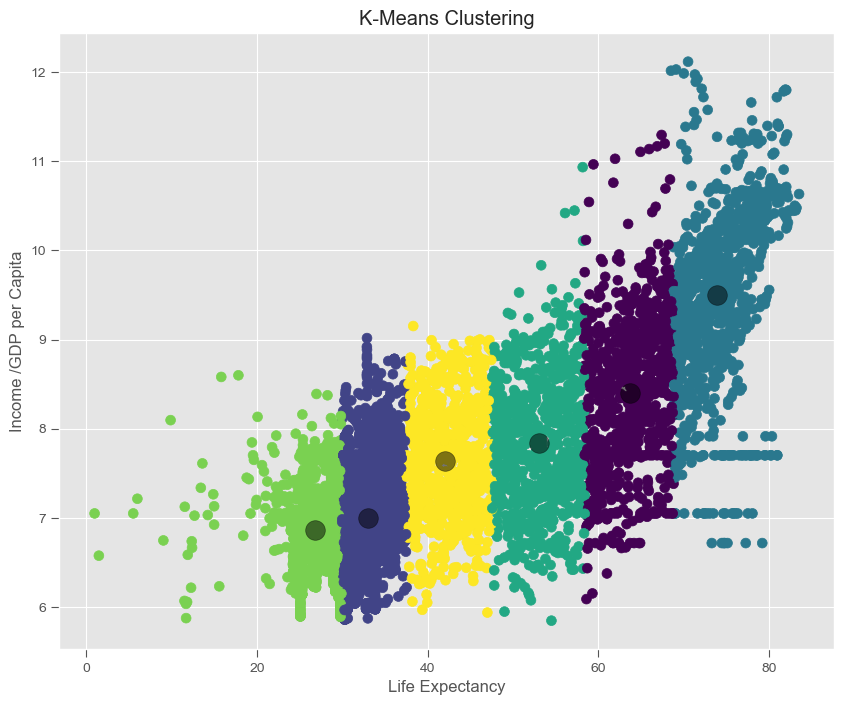

In [256]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, s=50,cmap=plt.cm.get_cmap('viridis',6))

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Income /GDP per Capita')

In [278]:
y_true = y_true.ravel()

In [281]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score
hs = homogeneity_score(y_true,y_kmeans)
print(hs)

0.04377776551819167


In [282]:
from sklearn.metrics.cluster import completeness_score
cs = completeness_score(y_true,y_kmeans)
print(cs)

0.04539263805072674


reference - https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure

* homogeneity: each cluster contains only members of a single class.
* completeness: all members of a given class are assigned to the same cluster

in our case it is really poor almost to zero that means though we are able see clusters based on it life expectancy and income. However, overall the unsupervised approach isn't a good fit as homogeneity and completeness score are very low and close to zero. 

# Findings and Analysis Report

As learned it in Applied data science class, the epicycles of analysis are a highly iterative process and often starts with the asking the right questions. So I would like to present my findings obtained through various iterations of questions and analysis during the project.


* Dat cleaning and Preprocessing?

Clean and formatted data is ideal platform for performing analysis.
It is always essential to deal with the "NaN" values, just dropping the rows may cause loss of valuable information. Using the clean data function, we clean the columns and imputed values to missing data. As a result, I was able to retain the class balance across regions, countries and prevented the information loss.



* How the data is distributed , do we observe normal/powerlaw or skewed distributions? 

The gapminder dataset contains the census information from 197 countries and 6 regions around the world.
Histograms showed that the life, population and income variables are not normally distributed and with significant presence of outliers
I decided to take a log of income column and define new variable as 'log_income'.
Another reason to take logarithms was the presence of correlation between income and life variables.


* What are the regions or countries that have highest life expectancy

Median life expectancy of Europe and Central Asia found to be highest followed life expectancy America, east asia and pacific. However, It was visible life expectancy was very low prior 1950 somewhere in range of *30-40* years. 
This finding can be loosely correlated to various events such as world war, inadquate medicine practices,  lack of technology for curing through critical illnesss. While performing time series analysis it was clear life expectancy grown expoenentially post year 1950.

* What is most densly populated region and country ?

In categorical analysis South Asia found most densely populated region with countries like China and India. 
South Asia xperienced rapid growth in poulation compare to other regions, after year 1950.

* Do we have any correlation between features , what feature are mostly correlated ?

Income and Year apprears found significant positive correlations with life expectancy, scaling the data using logarithms helped to see actually correlation. The pearson coefficient was 0.55 between income and life however after when normalize the income to the life expectancy it was bumped up to 0.8 and prooved as breakthrough for developing linear regression model.

* Can we predict the life expectancy using available features ?

Statistical models can effectively predict the life exepectancy..
During the sci-kit learn experimenation, income and Year variable had highest impact on the model as shown in weights plots of coefficients. The mean absoute error 6.21 Years for the life expectancy predictions from the sci-kit learn module.
When evaluated the predictions vs actual values and the plot, the results were not that bad.

* Can we statistically test our model that predicts the life expectancy ?

The Ordinary Least square method from statsmodel gives excellent way to statistically test the model , in OLS method we tried to predict the life expectency using just the income column and observed that the p-values were less than cut off 0.05


* What property does the residual shows heteroscedasticity or homoscedasticity?

Residual plot showed us homoscedasticity property for the life expectancy values fitted between 30-70, the statistical model were affected bit by the outliers in the data, also the limitation of scaling did not allow us to use multiple variables in stats model.  Some kind of polynomial distribution of residuals they are not exactly random but this is mainly due to outliers however overall the inear model is a good fit for the values beween 30 - 65 of life expectancy.

* If we do unsupervised model , can we cluster the data using available features. 

We were able to obtain clusters using K-means unsupervised approach that process numerical features such as income and life expectacny to classify the data points in various regions. 

Though clustering was not greatly intuitive with homogeneity and completeness score close to zero, we were still able to visualize clusters along with the centers and explore the clustering analysis.